![Logistic Regression](https://pbs.twimg.com/media/FN4ZYKnXwAAfs07?format=jpg&name=large)

Logistic Regression is a Statistical method for analyzing a dataset in which there are one or more independent variables that determine on outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcome).
![Sigmoid Function](https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg)

[Click to see my article on Logistic Regression](https://medium.com/machine-learning-researcher/logistic-regression-in-machine-learning-ad4d5fef88bb)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b>Ionosphere Data Set: </b>This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.=The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.
Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.
* All 34 are continuous
* The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

https://archive.ics.uci.edu/ml/datasets/Ionosphere

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [2]:
df = pd.read_table('ionosphere.data', sep = ',', header = None,  prefix = 'col')
df.head(5)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information and Visualization </font>

#### <font color = blue> View all Rows and Cols

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### <font color = blue> Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col0    351 non-null    int64  
 1   col1    351 non-null    int64  
 2   col2    351 non-null    float64
 3   col3    351 non-null    float64
 4   col4    351 non-null    float64
 5   col5    351 non-null    float64
 6   col6    351 non-null    float64
 7   col7    351 non-null    float64
 8   col8    351 non-null    float64
 9   col9    351 non-null    float64
 10  col10   351 non-null    float64
 11  col11   351 non-null    float64
 12  col12   351 non-null    float64
 13  col13   351 non-null    float64
 14  col14   351 non-null    float64
 15  col15   351 non-null    float64
 16  col16   351 non-null    float64
 17  col17   351 non-null    float64
 18  col18   351 non-null    float64
 19  col19   351 non-null    float64
 20  col20   351 non-null    float64
 21  col21   351 non-null    float64
 22  co

#### <font color = blue> Visualize Target Class Label Distributiuon

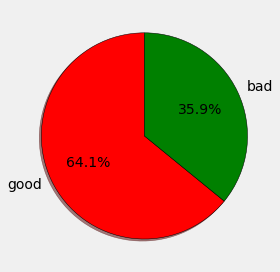

In [5]:
plt.style.use('fivethirtyeight')
good = df[df['col34'] == 'g'].shape[0]
bad = df[df['col34'] == 'b'].shape[0]

class_ = [good, bad]
label = ['good', 'bad']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and Target Attributes </font>

In [15]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attributes

In [16]:
X.tail(3)

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
348,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243
350,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151


#### <font color = blue> Target Attribute

In [17]:
Y.head(3)

0    g
1    b
2    g
Name: col34, dtype: object

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Split the Data into Training and Testing </font>

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

#### <font color = blue> Training Data

In [19]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (280, 32)
Y_train (280,)


#### <font color = blue> Testing Data

In [20]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (71, 32)
X_test (71,)


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Check Missing Value </font>

In [21]:
df.isnull().sum()

col0     0
col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
col11    0
col12    0
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col25    0
col26    0
col27    0
col28    0
col29    0
col30    0
col31    0
col32    0
col33    0
col34    0
dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Feature Selection - With Correlation </font>

#### <font color = blue> Correlation

In [24]:
corr = X.corr()
corr

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
col2,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,0.169981,0.217597,0.164550,0.198306,0.094301,0.221446,0.172002,0.285280,0.150800,0.149374,0.138065,0.250832,-0.012570,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584
col3,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,0.315877,-0.149216,0.236604,-0.253150,0.185872,-0.251143,-0.147451,-0.332213,0.167244,-0.281084,-0.035401,-0.143719,0.164196,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608
col4,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,0.042896,0.482118,0.127217,0.398878,0.087992,0.277932,0.027588,0.221532,0.041959,0.326223,0.163663,0.502878,0.098274,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478
col5,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,0.163933,-0.307197,0.135206,-0.359342,0.157740,-0.316705,0.188073,-0.208571,-0.061261,-0.114966,-0.132422,-0.215778,-0.286541,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215
col6,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,-0.020395,0.631060,0.083657,0.615407,-0.021493,0.379737,0.115927,0.372572,0.158917,0.586627,0.190805,0.373186,0.112717,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460
col7,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,0.429146,-0.355875,0.253740,-0.352216,0.419673,-0.491863,0.068717,-0.400523,0.077624,-0.370473,-0.212007,-0.270624,0.007045,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610
col8,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,-0.167705,0.562072,-0.088988,0.618461,-0.032689,0.633574,0.200786,0.673490,0.067314,0.492411,0.237322,0.352218,0.161258,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597
col9,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,0.441505,-0.406358,0.323813,-0.374908,0.334135,-0.392047,0.130752,-0.471665,-0.001418,-0.404818,-0.040414,-0.318463,0.101850,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104
col10,0.325016,-0.190090,0.449829,-0.291447,0.412876,-0.364003,0.670813,-0.337374,1.000000,-0.217968,0.619217,-0.216747,0.664243,-0.031705,0.748290,0.107085,0.590598,0.128132,0.518041,0.325267,0.561689,0.172768,0.365821,0.131849,0.292281,0.197369,0.396851,0.074600,0.294646,0.023922,0.339506,-0.152225
col11,0.169981,0.315877,0.042896,0.163933,-0.020395,0.429146,-0.167705,0.441505,-0.217968,1.000000,-0.241755,0.422930,-0.232230,0.356078,-0.342053,0.077798,-0.374571,0.143439,-0.287651,-0.038893,-0.360763,0.175459,-0.233369,-0.076828,-0.227890,0.061292,-0.208294,0.138842,-0.208855,0.010276,-0.181166,0.066584


#### <font color = blue> Visualize the Correlation

<AxesSubplot:>

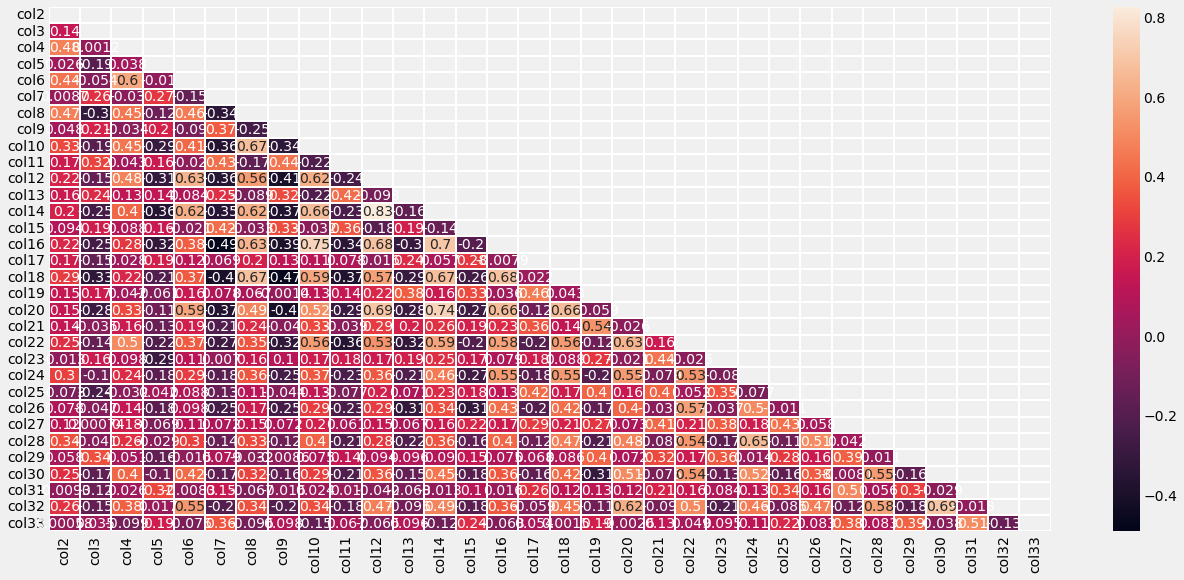

In [25]:
plt.figure(figsize = (20, 9))
matrix = np.triu(corr)        # take lower correlation matrix
sns.heatmap(corr, mask = matrix, annot = True, linewidth = 1.5)

#### <font color = blue> Remove Features (higest corr)

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

3

In [28]:
corr_features

{'col14', 'col16', 'col20'}

In [29]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [30]:
X_train.head()

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col15,col17,col18,col19,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
241,0.88103,-0.00857,0.89818,-0.02465,0.94105,-0.01822,0.89175,-0.12755,0.82208,-0.10932,0.88853,0.01179,-0.13719,-0.06109,0.90782,-0.02358,-0.14577,0.82851,-0.12433,0.90139,-0.19507,0.88245,-0.14903,0.84352,-0.12862,0.88424,-0.18542,0.91747,-0.16827
305,0.52542,-0.03390,0.94915,0.08475,0.52542,-0.16949,0.30508,-0.01695,0.50847,-0.13559,0.64407,0.28814,-0.35593,0.01695,0.55932,0.03390,0.30508,0.86441,0.05085,0.40678,0.15254,0.67287,-0.00266,0.66102,-0.03390,0.83051,-0.15254,0.76271,-0.10169
196,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-0.50000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,0.62500,1.00000,-0.75000,-0.75000,1.00000,1.00000,1.00000
21,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000
136,-1.00000,0.28105,0.22222,0.15033,-0.75693,-0.70984,-0.30719,0.71242,-1.00000,1.00000,-0.81699,0.33987,-0.02614,-0.83007,-0.60131,-0.54248,-0.83007,0.94118,-0.94118,-1.00000,-0.43137,0.74385,0.09176,-1.00000,0.05229,0.18301,0.02614,-0.40201,-0.48241


In [31]:
X_train.shape   # 32 - 3 = 31

(280, 29)

#### <font color = blue> Label Encoder

In [32]:
Y_train.head()

241    g
305    g
196    b
21     b
136    b
Name: col34, dtype: object

In [33]:
LE = LabelEncoder()
Y_train = LE.fit_transform(Y_train)
Y_test = LE.fit_transform(Y_test)        
Y_test                             # good = 1,  bad = 0

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1])

#### <font color = blue> Feature Scaling

In [34]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test)    # Same Scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.666421,-0.314401,0.653560,-0.710148,0.746774,-0.744497,0.682889,-0.917475,0.555918,-1.299476,0.604274,-1.235623,-1.450326,-1.425179,0.005115,-1.397340,-1.457606,-0.112218,-1.393374,-0.328480,-1.504689,-0.810503,-1.435035,-0.630298,-1.567059,-0.740709,-1.599992,-0.995077,-1.703023
1,0.714172,2.251875,0.765069,1.944862,0.709640,1.731103,-1.585891,1.683570,-2.457363,1.787006,-2.285763,1.824534,1.451955,-1.209473,-2.205076,-0.780844,-1.903770,-1.560290,-1.778928,0.857176,-1.873666,0.898257,-1.761427,1.061936,-1.925095,1.122114,-0.675384,1.196517,0.743216
2,0.542986,1.824619,-2.807448,1.944862,-1.988035,0.877325,-0.935680,0.248258,-1.263411,-0.513130,-0.715405,-0.387303,-0.193043,-0.011506,-0.596285,0.041743,0.001253,-0.657381,0.125687,-0.730536,0.135399,-1.080846,0.104737,-0.712006,0.108623,-0.664561,0.012362,-0.728771,0.007253
3,-1.265535,-0.068405,-1.300292,-0.252994,-1.172050,-0.197686,0.964142,1.683570,0.930160,1.787006,-0.664196,-0.205233,-0.119318,-2.093079,-2.205076,-1.911767,-0.000175,-0.657330,0.125325,-2.494275,-1.873666,-3.059910,-1.761427,-2.485948,2.142340,1.122114,0.012362,-0.728771,0.007253
4,-1.265535,-0.068405,-1.300292,-0.252994,-1.172050,-0.197686,-1.044233,-0.358997,0.230930,1.787006,-0.664196,-0.205233,-0.119318,-1.506066,0.297655,-1.911767,-0.000175,-0.657330,0.125325,-0.730483,0.135359,0.898257,0.309567,-0.712006,0.108623,-0.664561,0.012362,-0.728771,0.007253
5,-0.047263,0.370662,0.313932,-0.213872,0.430023,-0.146631,0.262758,-0.569545,0.514710,-0.132539,0.535131,-0.102526,0.005819,-0.187009,0.387344,0.358120,0.143985,0.434295,0.278446,0.330508,-0.009914,0.082934,0.268344,0.265028,0.631125,0.289327,0.194916,0.245598,0.204143
6,0.714172,2.251875,-1.300292,-0.252994,0.895514,-2.126474,-3.052607,-2.401563,0.930160,1.787006,0.957371,-2.234999,-0.119318,-2.093079,1.001539,1.991467,-0.000175,1.051591,-1.778928,-2.494275,-1.873666,0.898257,1.970901,-2.485948,2.142340,-2.451236,1.995139,-0.728771,0.007253
7,0.190005,-0.956910,0.355116,-0.027098,0.457728,0.096763,0.072022,-0.251721,0.930160,0.143396,0.502473,0.382466,0.594001,0.361517,0.429687,-0.015674,0.809387,0.250449,0.979801,0.936829,1.291533,-0.206586,1.004228,-0.490742,2.142340,-0.037974,0.998218,-0.139864,1.059736
8,0.714172,0.263070,0.765069,1.316913,0.895514,1.180029,0.964142,-0.650798,0.665930,-0.597528,0.957371,-0.153798,-0.119318,-0.299246,1.001539,0.110440,-0.544051,1.051591,0.125325,-0.226551,-0.438640,0.898257,0.196011,1.061936,0.214010,1.122114,1.145380,1.196517,0.007253
9,-0.435404,0.221212,-0.577416,0.021738,-0.692747,0.341507,-1.117257,0.546228,-0.835864,0.455718,-0.973769,0.477500,0.472612,0.846380,-1.159287,0.288232,0.096490,-0.975804,0.817787,-0.977467,0.038885,-1.278161,-0.028022,-2.485948,-1.925095,-0.716660,-0.135632,-0.738898,-0.126105


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Logistic Regression </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model

In [35]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

#### <font color = blue> Initialize Model

In [36]:
LG_scratch = LogisticRegression()

#### <font color = blue> Fit the Training Data into Model

In [37]:
LG_scratch.fit(X_train, Y_train)

#### <font color = blue> Predict the Test data

In [38]:
Y_pred_scratch = LG_scratch.predict(X_test)
Y_pred_scratch

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0])

#### <font color = blue> Accuracy Score

In [41]:
Accuracy_Scratch = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 0.9014084507042254


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model From Sklearn

In [42]:
from sklearn.linear_model import LogisticRegression

#### <font color = blue> Initialize Model

In [43]:
LG_Sklearn = LogisticRegression(random_state = 0)

#### <font color = blue> Fit the Training Data into Model

In [44]:
LG_Sklearn.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#### <font color = blue> Predict the Test data

In [45]:
Y_pred_Sklearn = LG_Sklearn.predict(X_test)
Y_pred_Sklearn

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

#### <font color = blue> Accuracy Score

In [46]:
Accuracy_Sklearn = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 0.8732394366197183


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

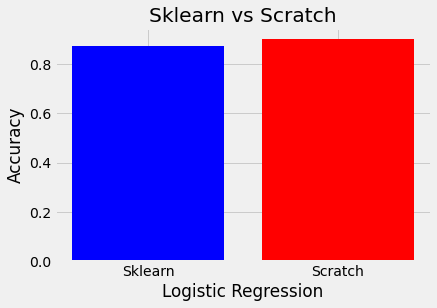

In [60]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch]
label = ["Sklearn", "Scratch"]
plt.bar(label, accuracy, color = ['blue', 'red'])
plt.title("Sklearn vs Scratch")
plt.xlabel("Logistic Regression")
plt.ylabel("Accuracy")
plt.show()

As you see Scratch gave slightly better result so we use this for result evaluation

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

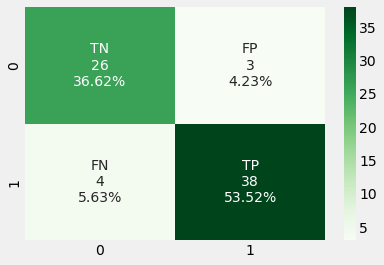

In [61]:
confusion_matrix_Scratch = confusion_matrix(Y_pred_scratch, Y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [63]:
# Accuracy Score
Accuracy = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(Y_pred_scratch, Y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_pred_scratch, Y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_pred_scratch, Y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(Y_pred_scratch, Y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(Y_pred_scratch, Y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.9014084507042254
Precision Score: 0.926829268292683
True positive Rate: 0.9047619047619048
False positive Rate 0.10344827586206896
F1 Score: 0.9156626506024096
Specificity: 0.896551724137931
Mean Absolute Error: 0.09859154929577464
ROC Area: 0.9006568144499179


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

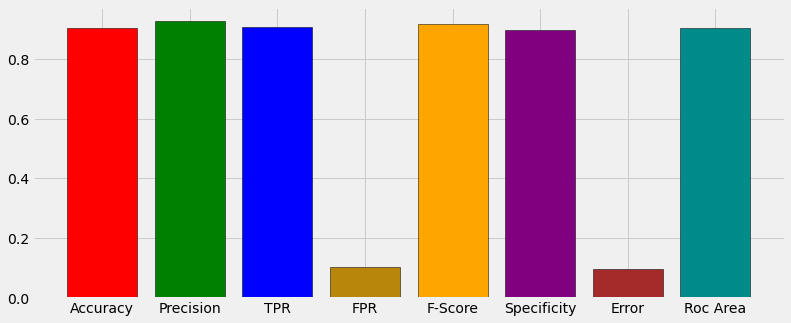

In [64]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali